### **Medical Insurance Price Prediction Model**

**✅ Step 1 : Importing the Necessary Libraries**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics

**✅ Step 2 : Data Collection and Analysis**

In [65]:
# Loading the Data from a .csv File
insurance_dataset = pd.read_csv('insurance.csv')

# Instead of .head() using .sample() gives us a better idea about the Dataset.
insurance_dataset.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [66]:
# Getting Some information about the dataset

shape = insurance_dataset.shape
print(shape)
print('')

insurance_dataset.info()

(1338, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Categorical Features :**

- Sex       (Either Male or Female : Just Like 1 and 0 )
- Smoker    (Either Yes or No : Again 1 and 0)
- Region    (We Have Four Values SouthEast , SouthWest, NorthEast, NorthWest)

***Here The Charges is our Target Variable and Other are Featues.***

In [67]:
# Checking For Null Values.

insurance_dataset.isnull().sum()

# Here the sum in each row is 0 which shows that in this Dataset we don't have
# any Missing Values (Basically the Null Values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Data Analysis (Understanding the Data)**

In [68]:
# Statical Measures of the DataSet

insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Distribution Graphs**

<ipython-input-69-80d8ec2f4ffb>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


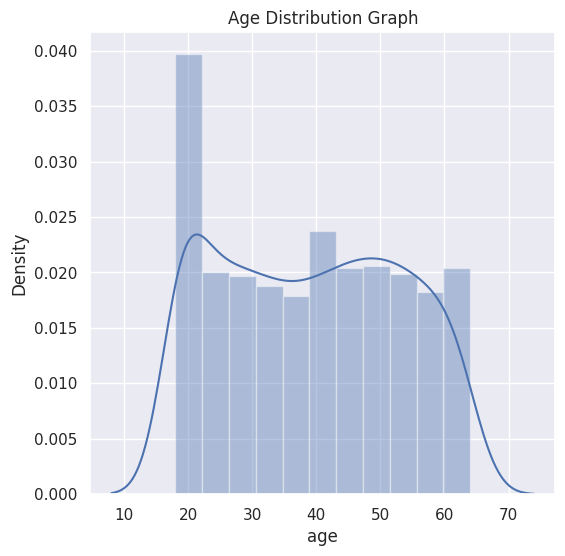

In [69]:
# Distribution of Age Values

sns.set()
plt.figure(figsize = (6,6))
# distplot is depricated
sns.distplot(insurance_dataset['age'])
# sns.displot(insurance_dataset['age'])
# sns.histplot(insurance_dataset['age'])
plt.title('Age Distribution Graph')
plt.show()


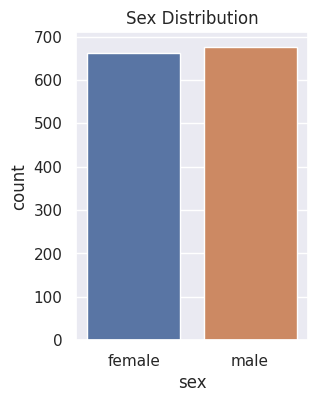

In [70]:
# For Gender Column

plt.figure(figsize = (3,4))
sns.countplot(x= 'sex', data = insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [71]:
# age_bins = [0, 10 ,20, 30, 40, 50, 60, 70, 80]
# age_labels = ['0-10','10-19','20-29', '30-39', '40-49', '50-59', '60-69','70-79']

# # Add a new column to the dataset with age groups
# insurance_dataset['age_group'] = pd.cut(insurance_dataset['age'], bins=age_bins, labels=age_labels)

# plt.figure(figsize=(6,6))
# sns.countplot(x='age_group', hue='sex', data=insurance_dataset)
# plt.title('Distribution of Male and Female in Each Age Group')
# plt.xlabel('Age Group')
# plt.ylabel('Count')
# plt.show()

<Figure size 400x400 with 0 Axes>

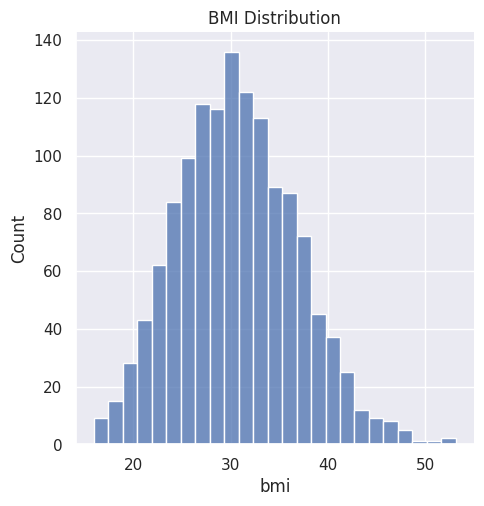

In [72]:
# BMI Distribution

plt.figure(figsize = (4,4))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI of a Person is around 18.5 to 24.9

if it is less than 18.5 than the person is UnderWeight and if it is more than 24.9 than he is Overweight.

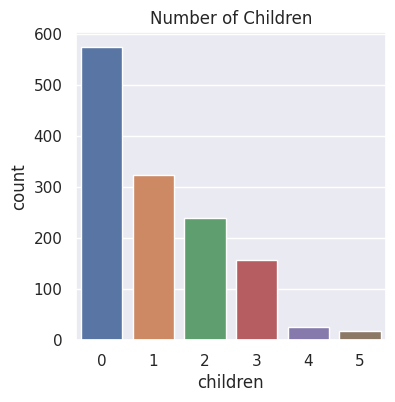

In [73]:
# Number of Children

plt.figure(figsize= (4,4))
sns.countplot(x='children', data = insurance_dataset)
plt.title("Number of Children")
plt.show()

In [74]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

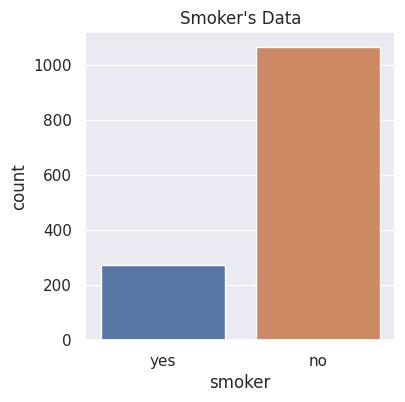

In [75]:
# Person is Smoker or Not

plt.figure(figsize= (4,4))
sns.countplot(x='smoker', data = insurance_dataset)
plt.title("Smoker's Data")
plt.show()

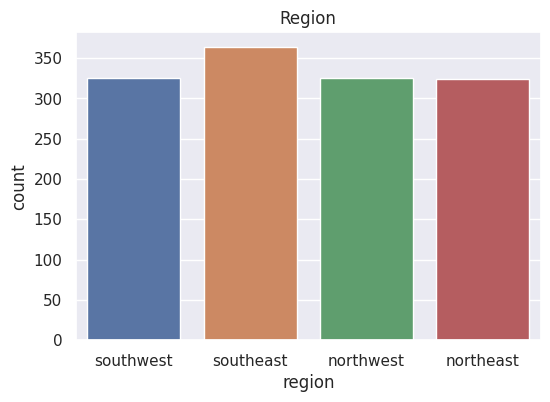

In [76]:
# Regions

plt.figure(figsize= (6,4))
sns.countplot(x='region', data = insurance_dataset)
plt.title("Region")
plt.show()

<Figure size 600x600 with 0 Axes>

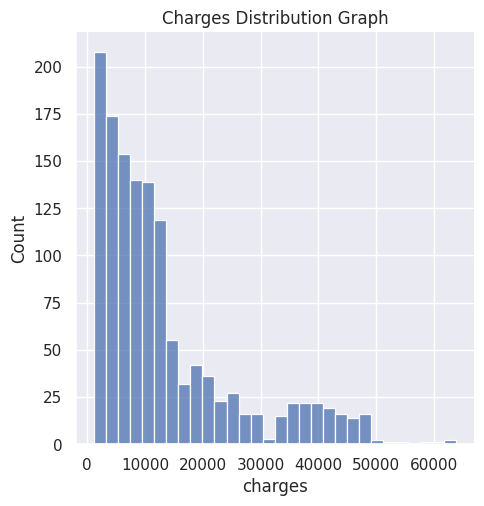

In [77]:
# Distribution of Charges : this is our Targete Value

plt.figure(figsize = (6,6))
# distplot is depricated
sns.displot(insurance_dataset['charges'])
# sns.displot(insurance_dataset['age'])
# sns.histplot(insurance_dataset['age'])
plt.title('Charges Distribution Graph')
plt.show()


**✅ Step 3 : Data Preprocessing**

Encoding the Categorical Features ( We are converting them into a Numerical Format)

In [78]:
# Encoding the Sex Column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace= True)

# Encoding Smoker Column
insurance_dataset.replace({'smoker':{'yes':0 ,'no':1}} , inplace = True)

#Encoding the Region Column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}} ,
inplace = True)

# One Hot Encoding
# insurance_dataset = pd.get_dummies(insurance_dataset, columns=['region'])

insurance_dataset.sample(7)


,age,sex,bmi,children,smoker,region,charges
769,38,1,19.475,2,1,3,6933.24225
640,33,0,42.400,5,1,1,6666.24300
1081,32,0,27.835,1,1,3,4454.40265
824,60,0,24.320,0,1,3,12523.60480
810,46,1,30.800,3,1,1,9414.92000
767,42,1,29.000,1,1,1,7050.64200
123,44,0,31.350,1,0,2,39556.49450


**✅ Step 4 : Spliting the Data**

- Spliting the columns of Datasets in Features and Target Value.

***Heat Map of the Dataset***

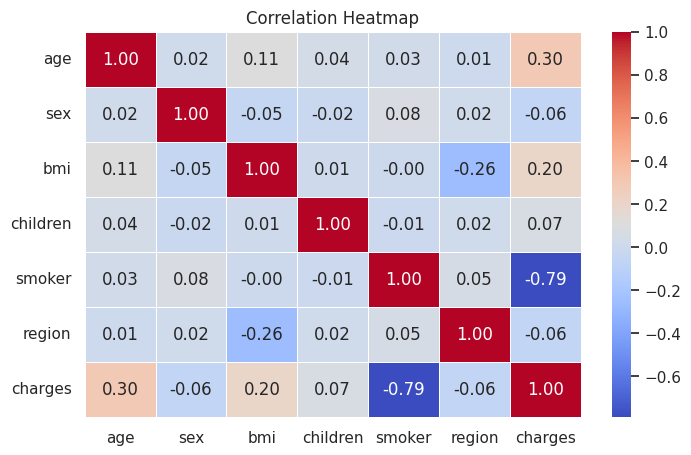

In [92]:
correlation_matrix = insurance_dataset.corr()
plt.figure(figsize=(8,5))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [79]:
# X = insurance_dataset.iloc[:,0:6]
# Y = insurance_dataset.iloc[:,-1]

# Y

X = insurance_dataset.drop(columns = ['region','charges'],axis=1)
Y = insurance_dataset['charges']


- Spliting the Dataset into a Training and Testing Dataset

In [80]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state =2)

print(X.shape,X_train.shape, X_test.shape)

print(X_train.iloc[0].values.reshape(1,5))
print(Y_train.iloc[0].reshape(1,1))

(1338, 5) (1070, 5) (268, 5)
[[21.     1.    22.135  0.     1.   ]]
[[2585.85065]]


**✅ Step 5 : Model Training**

We will be using a Linear Regression Model

In [81]:
regressor = LinearRegression()

regressor.fit(X_train,Y_train)

LinearRegression()

**Model Evaluation**

In [82]:
# trainingDataPrediction = regressor.predict(X_train.iloc[0].values.reshape(1,6))
trainingDataPrediction = regressor.predict(X_train)

# print(X_train.iloc[0].values.reshape(1,6))
# print(Y_train.iloc[0])
trainingDataPrediction


array([  438.48927565,  9007.53018514, 13265.208111  , ...,
       17298.26025725,  9753.96279907, 13626.55730754])

In [83]:
Y_train

882      2585.85065
505      6796.86325
798     11848.14100
792      2731.91220
201      8871.15170
           ...     
466     13224.69300
299      9249.49520
493     12574.04900
527      9861.02500
1192    13019.16105
Name: charges, Length: 1070, dtype: float64

In [84]:
X_train

,age,sex,bmi,children,smoker
882,21,1,22.135,0,1
505,37,0,30.875,3,1
798,58,1,33.100,0,1
792,22,1,23.180,0,1
201,48,1,32.230,1,1
...,...,...,...,...,...
466,60,1,28.700,1,1
299,48,1,28.880,1,1
493,61,0,43.400,0,1
527,51,1,25.800,1,1


In [85]:
# R Squared Value

r2_train = metrics.r2_score(Y_train,trainingDataPrediction)

print(r2_train)

0.7511416233816596


Building a Predictive System

In [88]:
input_data = (21,1,22.135,0,1)

# Changing the Data into numpy array

np_arr = np.asarray(input_data)

#Reshape the Array

input_data_reshaped = np_arr.reshape(1,-1)

predict_testing = regressor.predict(input_data_reshaped)

predict_testing

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([438.48927565])